In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [49]:
X,y = make_classification(n_features = 5,n_redundant = 0,n_informative = 5,n_clusters_per_class = 1)

In [50]:
df = pd.DataFrame(X,columns = ['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.261982,2.611189,0.479879,1.383409,1.431101,1
1,2.562406,1.271196,3.074810,-4.536967,-0.707295,0
2,0.605024,2.153802,-0.962083,2.523233,1.211161,1
3,-1.090644,1.888922,0.849522,2.195741,1.038056,1
4,1.382216,-0.183131,-1.168699,-0.347011,-2.754717,1


In [51]:
# Function for row Sampling.....
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace = True)

In [52]:
# Function for feature sampling .....
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:,-1],int(percent*df.shape[1]))

  return df[cols]

In [53]:
# Function for feature sampling .......
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [54]:
df1 = sample_rows(df,0.1)

In [55]:
df2 = sample_rows(df,0.1)

In [56]:
df3 = sample_rows(df,0.1)

In [57]:
df2.shape

(10, 6)

In [58]:
df1.shape

(10, 6)

In [59]:
df3.shape

(10, 6)

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [69]:
clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:4],df1.iloc[:,-1])
clf3.fit(df3.iloc[:,0:4],df1.iloc[:,-1])


DecisionTreeClassifier()

In [70]:
from sklearn.tree import plot_tree


[Text(0.5, 0.75, 'x[2] <= 0.365\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.625, 0.5, '  False')]

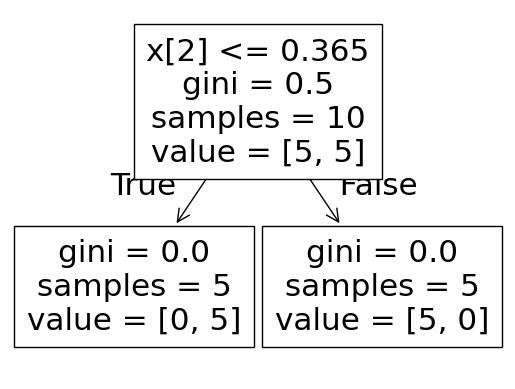

In [71]:
plot_tree(clf1)

[Text(0.5, 0.9, 'x[0] <= 1.548\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.7, 'x[3] <= -2.278\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.5, 'x[0] <= 1.38\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 1.479\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5833333333333333, 0.8, '  False')]

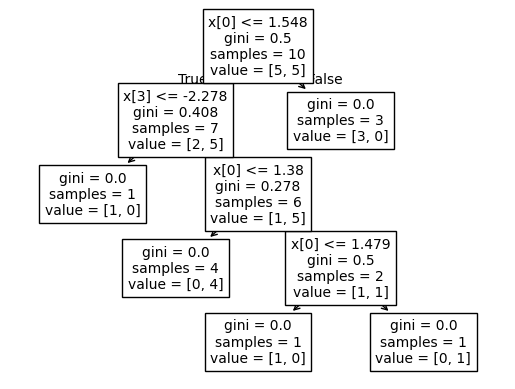

In [64]:
plot_tree(clf2)

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.607\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[1] <= 0.98\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= 1.593\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

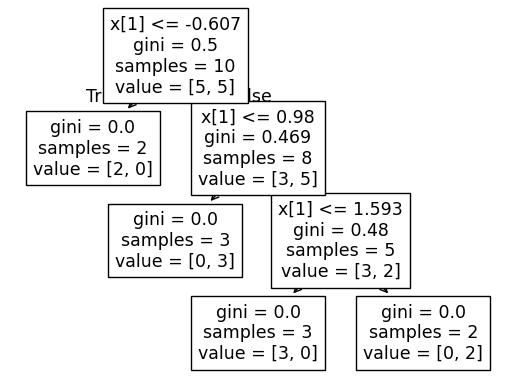

In [65]:
plot_tree(clf3)

In [66]:
clf1.predict(np.array([0,0]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [67]:
clf2.predict(np.array([0,0]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [68]:
clf3.predict(np.array([0,0]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])